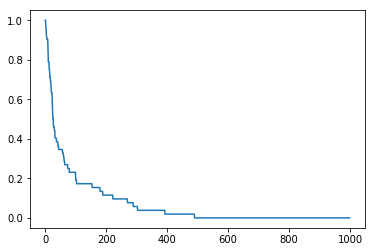

In [41]:
from statsmodels.distributions.empirical_distribution import ECDF

ecfd = ECDF(data1)
plt.plot(1-ecfd(x))
plt.show()

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import auc

In [2]:
from sksurv.datasets import load_veterans_lung_cancer
data_x, data_y = load_veterans_lung_cancer()
data_x

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard
5,49.0,squamous,20.0,5.0,no,standard
6,69.0,squamous,40.0,10.0,yes,standard
7,68.0,squamous,80.0,29.0,no,standard
8,43.0,squamous,50.0,18.0,no,standard
9,70.0,squamous,70.0,6.0,no,standard


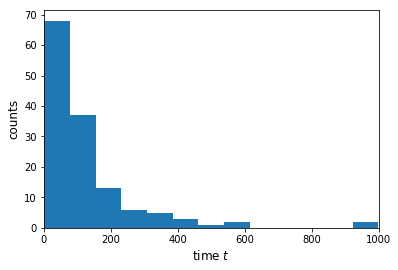

In [3]:
plt.hist(data_y['Survival_in_days'], bins = 'doane')
plt.xlabel('time $t$',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.xlim([0,1000])
plt.show()

In [163]:
np.median(data_y['Survival_in_days'])

80.0

# Kaplan-Meier Survival Time

In [4]:
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.nonparametric import nelson_aalen_estimator

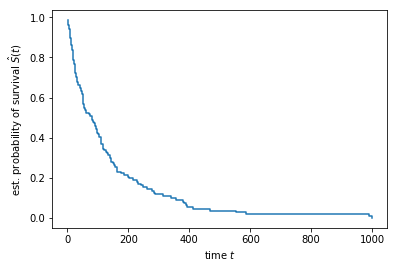

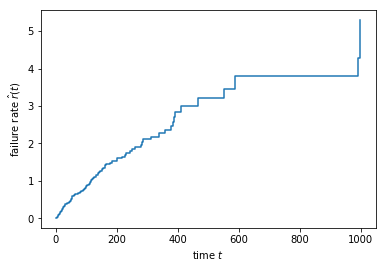

In [57]:
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.nonparametric import nelson_aalen_estimator

time, survival_prob = kaplan_meier_estimator(data_y["Status"],data_y['Survival_in_days'])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.show()


time, hazard = nelson_aalen_estimator(data_y["Status"],data_y['Survival_in_days'])
plt.step(time, hazard, where="post")
plt.ylabel("failure rate $\hat{r}(t)$")
plt.xlabel("time $t$")
plt.show()

# Treatment

computed AUC using sklearn.metrics.auc: 116.19078076658607
103.0
standard 115.14492753623189
computed AUC using sklearn.metrics.auc: 131.99023802521006
52.0
test 128.2058823529412


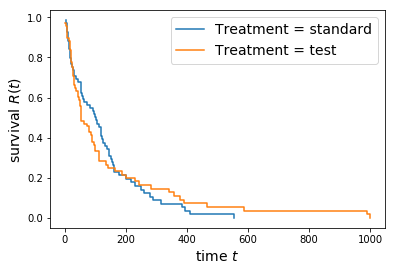

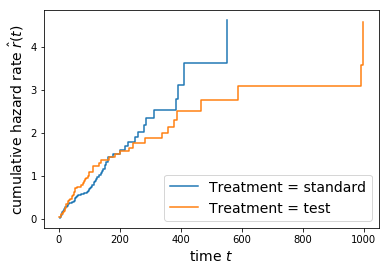

In [26]:
for treatment_type in ("standard", "test"):
    mask_treat = data_x["Treatment"] == treatment_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_y["Status"][mask_treat],
        data_y["Survival_in_days"][mask_treat])
    xx = time_treatment
    yy = survival_prob_treatment
    print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))
    print((xx[yy<0.5])[0])
    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="Treatment = %s" % treatment_type)
    print(treatment_type, np.mean(data_y["Survival_in_days"][mask_treat]))

    

plt.ylabel("survival ${R}(t)$", fontsize = 14)
plt.xlabel("time $t$", fontsize = 14)
plt.legend(loc="best", fontsize = 14)
plt.show()




for treatment_type in ("standard", "test"):
    mask_treat = data_x["Treatment"] == treatment_type
    time_treatment, haz = nelson_aalen_estimator(
        data_y["Status"][mask_treat],
        data_y["Survival_in_days"][mask_treat])

    plt.step(time_treatment, haz, where="post",
             label="Treatment = %s" % treatment_type)

plt.ylabel("cumulative hazard rate $\hat{r}(t)$", fontsize = 14)
plt.xlabel("time $t$", fontsize = 14)
plt.legend(loc="best", fontsize = 14)
plt.show()





In [24]:
np.mean(data_y["Survival_in_days"][data_x["Treatment"] == "test"])

128.2058823529412

## Celltype

squamous 200.2
computed AUC using sklearn.metrics.auc: 212.1088721804512
median squamous 118.0
smallcell 71.66666666666667
computed AUC using sklearn.metrics.auc: 71.43978266460908
median smallcell 51.0
adeno 64.11111111111111
computed AUC using sklearn.metrics.auc: 58.99176954732511
median adeno 51.0
large 166.11111111111111
computed AUC using sklearn.metrics.auc: 147.81687242798358
median large 156.0


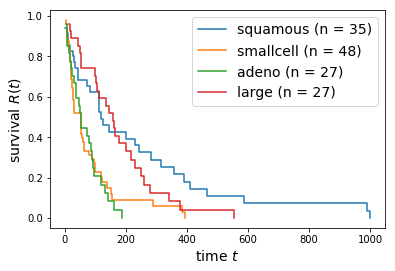

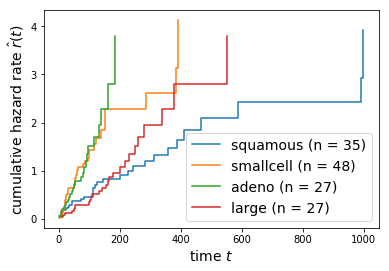

In [28]:
for value in data_x["Celltype"].unique():
    mask = data_x["Celltype"] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(data_y["Status"][mask],
                                                           data_y["Survival_in_days"][mask])
    plt.step(time_cell, survival_prob_cell, where="post",
             label="%s (n = %d)" % (value, mask.sum()))
    print(value, np.mean(data_y["Survival_in_days"][mask]))
    xx = time_cell
    yy = survival_prob_cell
    print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))
    print('median',value,(xx[yy<0.5])[0])


plt.ylabel("survival ${R}(t)$", fontsize = 14)
plt.xlabel("time $t$", fontsize = 14)
plt.legend(loc="best", fontsize = 14)
plt.show()


for value in data_x["Celltype"].unique():
    mask = data_x["Celltype"] == value
    time, haz = nelson_aalen_estimator(
        data_y["Status"][mask],
        data_y["Survival_in_days"][mask])

    plt.step(time, haz, where="post",
             label="%s (n = %d)" % (value, mask.sum()))

plt.ylabel("cumulative hazard rate $\hat{r}(t)$", fontsize = 14)
plt.xlabel("time $t$", fontsize = 14)
plt.legend(loc="best", fontsize = 14)
plt.show()


computed AUC using sklearn.metrics.auc: 58.99176954732511
median ade 51.0
computed AUC using sklearn.metrics.auc: 142.61706061807914
median other 95.0


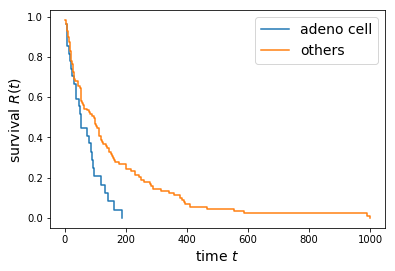

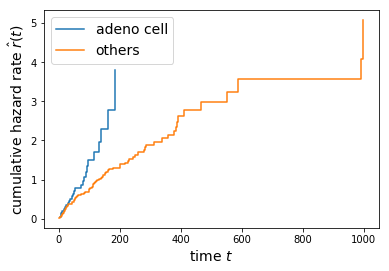

In [29]:
mask = data_x["Celltype"] == "adeno"
time_treatment, survival_prob_treatment = kaplan_meier_estimator(
data_y["Status"][mask],
data_y["Survival_in_days"][mask])    
plt.step(time_treatment, survival_prob_treatment, where="post",
             label="adeno cell")
xx = time_treatment
yy = survival_prob_treatment
print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))
print('median ade',(xx[yy<0.5])[0])



mask = data_x["Celltype"] != "adeno"
time_treatment, survival_prob_treatment = kaplan_meier_estimator(
data_y["Status"][mask],
data_y["Survival_in_days"][mask])    
plt.step(time_treatment, survival_prob_treatment, where="post",
             label="others")
b = np.sum(time_treatment*survival_prob_treatment)
xx = time_treatment
yy = survival_prob_treatment
print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))
print('median other',(xx[yy<0.5])[0])



plt.ylabel("survival ${R}(t)$", fontsize = 14)
plt.xlabel("time $t$", fontsize = 14)
plt.legend(loc="best", fontsize = 14)
plt.show()


mask = data_x["Celltype"] == "adeno"
time_treatment, survival_prob_treatment = nelson_aalen_estimator(
data_y["Status"][mask],
data_y["Survival_in_days"][mask])    
plt.step(time_treatment, survival_prob_treatment, where="post",
             label="adeno cell")
a = np.sum(time_treatment*survival_prob_treatment)


mask = data_x["Celltype"] != "adeno"
time_treatment, survival_prob_treatment = nelson_aalen_estimator(
data_y["Status"][mask],
data_y["Survival_in_days"][mask])    
plt.step(time_treatment, survival_prob_treatment, where="post",
             label="others")
b = np.sum(time_treatment*survival_prob_treatment)


plt.ylabel("cumulative hazard rate $\hat{r}(t)$", fontsize = 14)
plt.xlabel("time $t$", fontsize = 14)
plt.legend(loc="best", fontsize = 14)
plt.show()


## Prior therapy

computed AUC using sklearn.metrics.auc: 147.57321111111108
median other 82.0
computed AUC using sklearn.metrics.auc: 116.1207814394008
median other 80.0


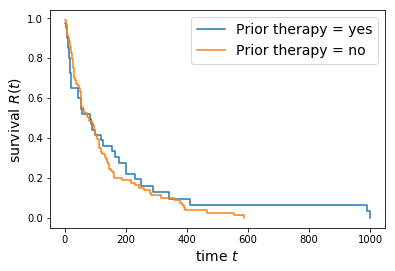

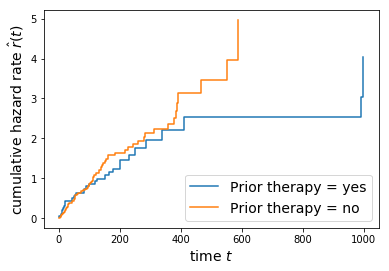

In [31]:
for prith in ("yes", "no"):
    mask = data_x["Prior_therapy"] == prith
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_y["Status"][mask],
        data_y["Survival_in_days"][mask])
    
    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="Prior therapy = %s" % prith)
    xx = time_treatment
    yy = survival_prob_treatment
    print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))
    print('median other',(xx[yy<0.5])[0])


plt.ylabel("survival ${R}(t)$", fontsize = 14)
plt.xlabel("time $t$", fontsize = 14)
plt.legend(loc="best", fontsize = 14)
plt.show()


for prith in ("yes", "no"):
    mask = data_x["Prior_therapy"] == prith
    time, haz = nelson_aalen_estimator(
        data_y["Status"][mask],
        data_y["Survival_in_days"][mask])

    plt.step(time, haz, where="post",
             label="Prior therapy = %s" % prith)

plt.ylabel("cumulative hazard rate $\hat{r}(t)$", fontsize = 14)
plt.xlabel("time $t$", fontsize = 14)
plt.legend(loc="best", fontsize = 14)
plt.show()

## Age

computed AUC using sklearn.metrics.auc: 155.59479840134998
median < 60 92.0
computed AUC using sklearn.metrics.auc: 104.37366090131066
median other 72.0


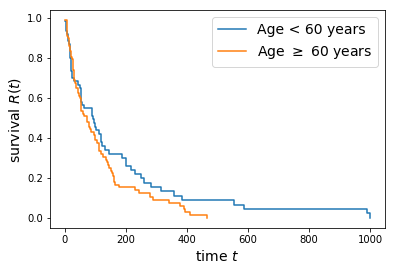

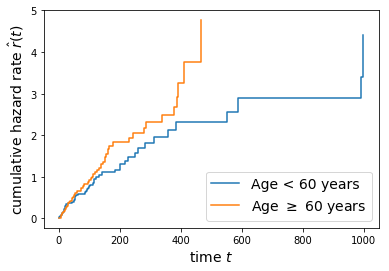

In [33]:
mask = data_x["Age_in_years"] <=60
time_treatment, survival_prob_treatment = kaplan_meier_estimator(
data_y["Status"][mask],
data_y["Survival_in_days"][mask])    
plt.step(time_treatment, survival_prob_treatment, where="post",
             label="Age < 60 years")
b = np.sum(time_treatment*survival_prob_treatment)
xx = time_treatment
yy = survival_prob_treatment
print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))
print('median < 60',(xx[yy<0.5])[0])




mask = data_x["Age_in_years"] >60
time_treatment, survival_prob_treatment = kaplan_meier_estimator(
data_y["Status"][mask],
data_y["Survival_in_days"][mask])    
plt.step(time_treatment, survival_prob_treatment, where="post",
             label="Age $\geq$ 60 years")
a = np.sum(time_treatment*survival_prob_treatment)
xx = time_treatment
yy = survival_prob_treatment
print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))
print('median other',(xx[yy<0.5])[0])



plt.ylabel("survival ${R}(t)$", fontsize = 14)
plt.xlabel("time $t$", fontsize = 14)
plt.legend(loc="best", fontsize = 14)
plt.show()



mask = data_x["Age_in_years"] <=60
time_treatment, survival_prob_treatment = nelson_aalen_estimator(
data_y["Status"][mask],
data_y["Survival_in_days"][mask])    
plt.step(time_treatment, survival_prob_treatment, where="post",
             label="Age < 60 years")
b = np.sum(time_treatment*survival_prob_treatment)

mask = data_x["Age_in_years"] >60
time_treatment, survival_prob_treatment = nelson_aalen_estimator(
data_y["Status"][mask],
data_y["Survival_in_days"][mask])    
plt.step(time_treatment, survival_prob_treatment, where="post",
             label="Age $\geq$ 60 years")
a = np.sum(time_treatment*survival_prob_treatment)


plt.ylabel("cumulative hazard rate $\hat{r}(t)$", fontsize = 14)
plt.xlabel("time $t$", fontsize = 14)
plt.legend(loc="best", fontsize = 14)
plt.show()


## Karnoff

computed AUC using sklearn.metrics.auc: 57.15264423076924
median < 50 21.0
computed AUC using sklearn.metrics.auc: 159.15437491289381
median >50 112.0


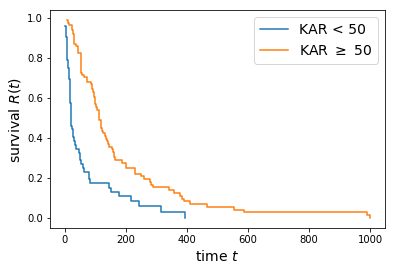

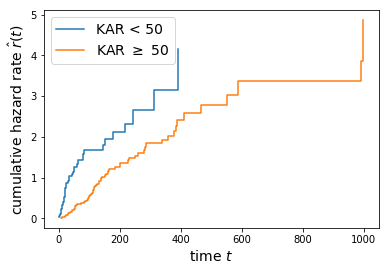

In [34]:
mask = data_x["Karnofsky_score"] <=50
time_treatment, survival_prob_treatment = kaplan_meier_estimator(
data_y["Status"][mask],
data_y["Survival_in_days"][mask])    
plt.step(time_treatment, survival_prob_treatment, where="post",
             label="KAR < 50")
xx = time_treatment
yy = survival_prob_treatment
print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))
print('median < 50',(xx[yy<0.5])[0])

mask = data_x["Karnofsky_score"] >50
time_treatment, survival_prob_treatment = kaplan_meier_estimator(
data_y["Status"][mask],
data_y["Survival_in_days"][mask])    
plt.step(time_treatment, survival_prob_treatment, where="post",
             label="KAR $\geq$ 50")
xx = time_treatment
yy = survival_prob_treatment
print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))
print('median >50',(xx[yy<0.5])[0])


plt.ylabel("survival ${R}(t)$", fontsize = 14)
plt.xlabel("time $t$", fontsize = 14)
plt.legend(loc="best", fontsize = 14)
plt.show()


mask = data_x["Karnofsky_score"] <=50
time_treatment, survival_prob_treatment = nelson_aalen_estimator(
data_y["Status"][mask],
data_y["Survival_in_days"][mask])    
plt.step(time_treatment, survival_prob_treatment, where="post",
             label="KAR < 50")

mask = data_x["Karnofsky_score"] >50
time_treatment, survival_prob_treatment = nelson_aalen_estimator(
data_y["Status"][mask],
data_y["Survival_in_days"][mask])    
plt.step(time_treatment, survival_prob_treatment, where="post",
             label="KAR $\geq$ 50")




plt.ylabel("cumulative hazard rate $\hat{r}(t)$", fontsize = 14)
plt.xlabel("time $t$", fontsize = 14)
plt.legend(loc="best", fontsize = 14)
plt.show()

# Cox's model

In [169]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_x_numeric, data_y)

CoxPHSurvivalAnalysis(alpha=0, n_iter=100, tol=1e-09, verbose=0)

In [170]:
pd.Series(estimator.coef_, index=data_x_numeric.columns)

Age_in_years            -0.008549
Celltype=large          -0.788672
Celltype=smallcell      -0.331813
Celltype=squamous       -1.188299
Karnofsky_score         -0.032622
Months_from_Diagnosis   -0.000092
Prior_therapy=yes        0.072327
Treatment=test           0.289936
dtype: float64

In [168]:
from sksurv.preprocessing import OneHotEncoder

data_x_numeric = OneHotEncoder().fit_transform(data_x)
data_x_numeric.head()

,Age_in_years,Celltype=large,Celltype=smallcell,Celltype=squamous,Karnofsky_score,Months_from_Diagnosis,Prior_therapy=yes,Treatment=test
0,69.0,0.0,0.0,1.0,60.0,7.0,0.0,0.0
1,64.0,0.0,0.0,1.0,70.0,5.0,1.0,0.0
2,38.0,0.0,0.0,1.0,60.0,3.0,0.0,0.0
3,63.0,0.0,0.0,1.0,60.0,9.0,1.0,0.0
4,65.0,0.0,0.0,1.0,70.0,11.0,1.0,0.0


In [175]:
x_new = pd.DataFrame.from_dict({
    1: [75, 0, 1, 0, 40, 7, 0, 0],
    2: [30, 0, 0, 1, 70, 1, 1, 0]},
    orient='index')
x_new

,0,1,2,3,4,5,6,7
1,75,0,1,0,40,7,0,0
2,30,0,0,1,70,1,1,0


In [195]:
from sklearn.metrics import auc


xx = pred_surv[1].x
yy = pred_surv[1].y

print('computed AUC using sklearn.metrics.auc: {}'.format(auc(xx,yy)))


computed AUC using sklearn.metrics.auc: 228.24897165556226


In [188]:
np.sum(pred_surv[1].x*pred_surv[1].y)

5248.4804328247346

In [187]:
pred_surv[1].y

array([ 0.99556728,  0.99332172,  0.99104318,  0.98871611,  0.98167553,
        0.97184239,  0.96667591,  0.96404273,  0.95878562,  0.95344632,
        0.94797466,  0.94519056,  0.93671015,  0.93065069,  0.92434777,
        0.9177424 ,  0.91426328,  0.90728667,  0.89643185,  0.89261017,
        0.88876697,  0.88093935,  0.8730675 ,  0.86908478,  0.8650573 ,
        0.86093037,  0.85676092,  0.85259486,  0.84840122,  0.84420107,
        0.83985439,  0.8350702 ,  0.8203436 ,  0.80442702,  0.79886126,
        0.78769983,  0.78206402,  0.77640706,  0.77053677,  0.76461861,
        0.75857876,  0.75254262,  0.74022202,  0.7334633 ,  0.7334633 ,
        0.7265672 ,  0.7195778 ,  0.71238527,  0.70488123,  0.68973493,
        0.68973493,  0.67378565,  0.66562643,  0.65730348,  0.64866119,
        0.64004928,  0.62305854,  0.61440159,  0.597283  ,  0.58847908,
        0.57970918,  0.57970918,  0.5702214 ,  0.56072663,  0.55109222,
        0.54142951,  0.53173533,  0.52165985,  0.51166954,  0.50

(2,)


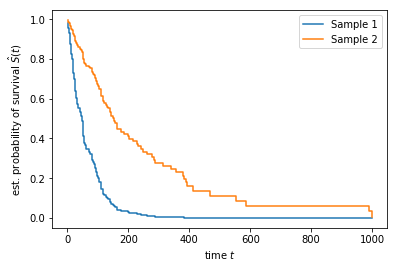

In [176]:
pred_surv = estimator.predict_survival_function(x_new)
print(pred_surv.shape)
for i, c in enumerate(pred_surv):
    plt.step(c.x, c.y, where="post", label="Sample %d" % (i + 1))
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")
plt.show()

In [174]:
def fit_and_score_features(X, y):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j:j+1]
        m.fit(Xj, y)
        scores[j] = m.score(Xj, y)
    return scores

scores = fit_and_score_features(data_x_numeric.values, data_y)
pd.Series(scores, index=data_x_numeric.columns).sort_values(ascending=False)

Karnofsky_score          0.709280
Celltype=smallcell       0.572581
Celltype=large           0.561620
Celltype=squamous        0.550545
Treatment=test           0.525386
Age_in_years             0.515107
Months_from_Diagnosis    0.509030
Prior_therapy=yes        0.494434
dtype: float64

# Parametricke modely

In [36]:
x = np.linspace(0,800,1000)

from scipy.stats import expon as exp
from scipy.stats import gamma as gam
from scipy.stats import truncnorm as trn
from scipy.stats import lognorm as lgn
from scipy.stats import fatiguelife as bir
from scipy.stats import weibull_min as wei


In [40]:
distributions = [ bir, wei]
distributions2 = [exp]

## Karnofsky > 50


In [41]:
for dist in distributions:

    ind1 = data_x['Karnofsky_score'] < 50 
    data1 = data_y['Survival_in_days'][ind1]
    data1c = data_y['Status'][ind1]
    ind2 = data_x['Karnofsky_score'] >= 50 
    data2 = data_y['Survival_in_days'][ind2]
    data2c = data_y['Status'][ind2]


    loc,scale, shape = dist.fit(data1)
    loc2,scale2, shape2 = dist.fit(data2)

    hist = plt.hist(data1,normed=True,alpha=0.2, color = 'blueviolet',label='Karnofsky < 50')
    hist = plt.hist(data2,normed=True,alpha=0.4, color = 'pink',label='Karnofsky $\geq$ 50')

    est1 = dist.pdf(x, loc,scale, shape)
    est2 = dist.pdf(x, loc2,scale2, shape2)

    plt.plot(x, est1,color = 'blue',label='Karnofsky < 50')
    plt.plot(x, est2,color = 'red',label='Karnofsky $\geq$ 50')

    plt.ylabel("probability density",fontsize=14)
    plt.xlabel("time $t$ (days)",fontsize=14)
    plt.xlim([0,500])
    plt.legend(fontsize=12)
    #plt.show()


    pdf1 = dist.pdf(x, loc,scale, shape)
    cdf1 = dist.cdf(x, loc,scale, shape)
    err = pdf1/(1-cdf1)
    plt.plot(err[2:],label = 'Karnofsky < 50')
    pdf2 = dist.pdf(x, loc2,scale2, shape2)
    cdf2 = dist.cdf(x, loc2,scale2, shape2)
    err2 = pdf2/(1-cdf2)
    plt.plot(err2[2:],label = 'Karnofsky $\geq$ 50')
    plt.xlabel('time $t$',fontsize = 14)
    plt.ylabel('$r(t)$',fontsize = 14)
    plt.legend(fontsize = 14)
    #plt.show()

    plt.plot(1-cdf1, label= 'Karnofsky < 50')
    plt.plot(1-cdf2, label = 'Karnofsky $\geq$ 50')
    plt.ylabel("${R}(t)$",fontsize = 14)
    plt.xlabel("time $t$",fontsize = 14)
    plt.legend(fontsize = 14)
    #plt.show()

    #print("MTTF1 for {}:  ".format(dist),dist.stats(loc, scale, shape, moments='m'))
    #print("MTTF2 for {}:  ".format(dist),dist.stats(loc2, scale2, shape2, moments='m'))
    
    print("Med1 for {}:  ".format(dist),dist.median(loc, scale, shape))
    print("Med2 for {}:  ".format(dist),dist.median(loc2, scale2, shape2))


Med1 for <scipy.stats._continuous_distns.fatiguelife_gen object at 0x0000021C568BCE10>:   22.789579481514526
Med2 for <scipy.stats._continuous_distns.fatiguelife_gen object at 0x0000021C568BCE10>:   100.35447661390576
Med1 for <scipy.stats._continuous_distns.weibull_min_gen object at 0x0000021C568CD7F0>:   37.75809850921278
Med2 for <scipy.stats._continuous_distns.weibull_min_gen object at 0x0000021C568CD7F0>:   102.87556682218485


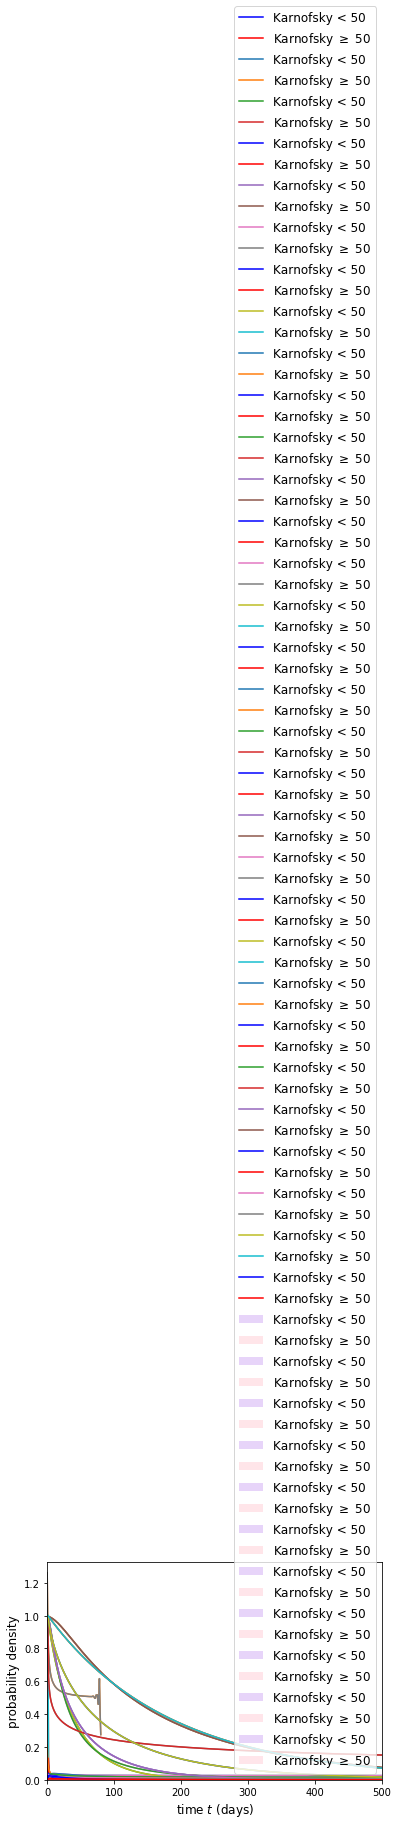

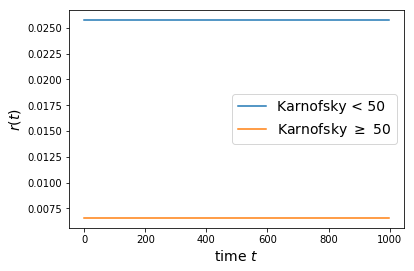

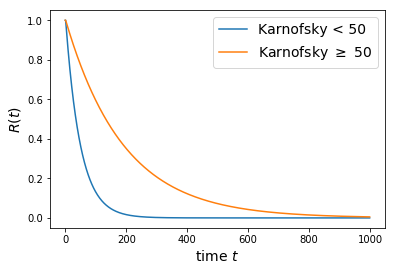

Med1 for <scipy.stats._continuous_distns.expon_gen object at 0x0000021C568BC470>:   27.940618817931192
Med2 for <scipy.stats._continuous_distns.expon_gen object at 0x0000021C568BC470>:   106.3653280040337


In [42]:
for dist in distributions2:

    ind1 = data_x['Karnofsky_score'] < 50 
    data1 = data_y['Survival_in_days'][ind1]
    data1c = data_y['Status'][ind1]
    ind2 = data_x['Karnofsky_score'] >= 50 
    data2 = data_y['Survival_in_days'][ind2]
    data2c = data_y['Status'][ind2]


    loc,scale = dist.fit(data1)
    loc2,scale2= dist.fit(data2)

    hist = plt.hist(data1,normed=True,alpha=0.2, color = 'blueviolet',label='Karnofsky < 50')
    hist = plt.hist(data2,normed=True,alpha=0.4, color = 'pink',label='Karnofsky $\geq$ 50')

    est1 = dist.pdf(x, loc,scale)
    est2 = dist.pdf(x, loc2,scale2)

    plt.plot(x, est1,color = 'blue',label='Karnofsky < 50')
    plt.plot(x, est2,color = 'red',label='Karnofsky $\geq$ 50')

    plt.ylabel("probability density",fontsize=12)
    plt.xlabel("time $t$ (days)",fontsize=12)
    plt.xlim([0,500])
    plt.legend(fontsize=12)
    plt.show()


    pdf1 = dist.pdf(x, loc,scale)
    cdf1 = dist.cdf(x, loc,scale)
    err = pdf1/(1-cdf1)
    plt.plot(err[2:],label = 'Karnofsky < 50')
    pdf2 = dist.pdf(x, loc2,scale2)
    cdf2 = dist.cdf(x, loc2,scale2)
    err2 = pdf2/(1-cdf2)
    plt.plot(err2[2:],label = 'Karnofsky $\geq$ 50')
    plt.xlabel('time $t$',fontsize = 14)
    plt.ylabel('$r(t)$',fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

    plt.plot(1-cdf1, label= 'Karnofsky < 50')
    plt.plot(1-cdf2, label = 'Karnofsky $\geq$ 50')
    plt.ylabel("${R}(t)$",fontsize = 14)
    plt.xlabel("time $t$",fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

    #print("MTTF1 for {}:  ".format(dist),dist.stats(loc, scale, moments='m'))
    #print("MTTF2 for {}:  ".format(dist),dist.stats(loc2, scale2, moments='m'))
    
    print("Med1 for {}:  ".format(dist),dist.median(loc, scale))
    print("Med2 for {}:  ".format(dist),dist.median(loc2, scale2))

# AGE >60

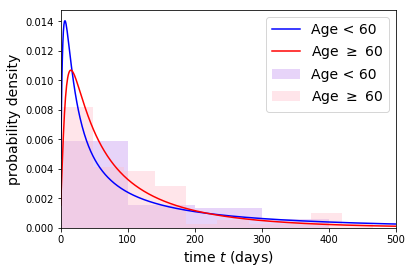

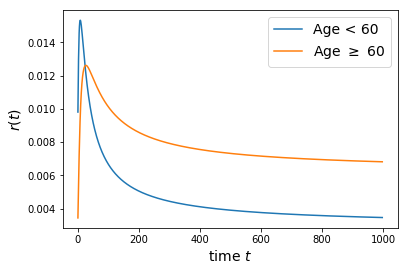

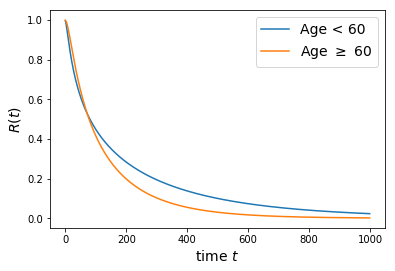

Med1 for <scipy.stats._continuous_distns.fatiguelife_gen object at 0x0000021C568BCE10>:   64.62811410324822
Med2 for <scipy.stats._continuous_distns.fatiguelife_gen object at 0x0000021C568BCE10>:   62.50865224130079


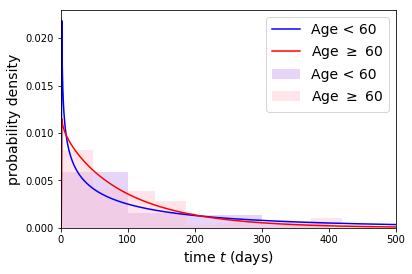

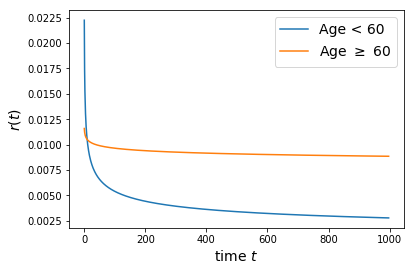

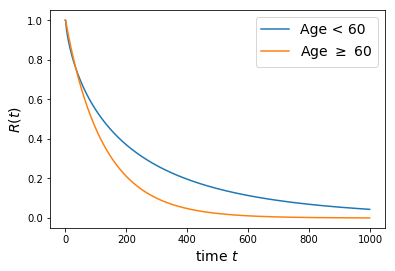

Med1 for <scipy.stats._continuous_distns.weibull_min_gen object at 0x0000021C568CD7F0>:   97.06881768442202
Med2 for <scipy.stats._continuous_distns.weibull_min_gen object at 0x0000021C568CD7F0>:   69.76473980525991


In [43]:
for dist in distributions:
    ind1 = data_x['Age_in_years'] < 60 
    data1 = data_y['Survival_in_days'][ind1]
    data1c = data_y['Status'][ind1]
    ind2 = data_x['Age_in_years'] >= 60 
    data2 = data_y['Survival_in_days'][ind2]
    data2c = data_y['Status'][ind2]


    loc,scale, shape = dist.fit(data1)
    loc2,scale2, shape2 = dist.fit(data2)

    hist = plt.hist(data1,normed=True,alpha=0.2, color = 'blueviolet',label='Age < 60')
    hist = plt.hist(data2,normed=True,alpha=0.4, color = 'pink',label='Age $\geq$ 60')

    est1 = dist.pdf(x, loc,scale, shape)
    est2 = dist.pdf(x, loc2,scale2, shape2)

    plt.plot(x, est1,color = 'blue',label='Age < 60')
    plt.plot(x, est2,color = 'red',label='Age $\geq$ 60')

    plt.ylabel("probability density",fontsize=14)
    plt.xlabel("time $t$ (days)",fontsize=14)
    plt.xlim([0,500])
    plt.legend(fontsize=14)
    plt.show()


    pdf1 = dist.pdf(x, loc,scale, shape)
    cdf1 = dist.cdf(x, loc,scale, shape)
    err = pdf1/(1-cdf1)
    plt.plot(err[2:],label = 'Age < 60')
    pdf2 = dist.pdf(x, loc2,scale2, shape2)
    cdf2 = dist.cdf(x, loc2,scale2, shape2)
    err2 = pdf2/(1-cdf2)
    plt.plot(err2[2:],label = 'Age $\geq$ 60')
    plt.xlabel('time $t$',fontsize = 14)
    plt.ylabel('$r(t)$',fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

    plt.plot(1-cdf1, label= 'Age < 60')
    plt.plot(1-cdf2, label = 'Age $\geq$ 60')
    plt.ylabel("${R}(t)$",fontsize = 14)
    plt.xlabel("time $t$",fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

    #print("MTTF1 for {}:  ".format(dist),dist.stats(loc, scale, shape, moments='m'))
    #print("MTTF2 for {}:  ".format(dist),dist.stats(loc2, scale2, shape2, moments='m'))
    print("Med1 for {}:  ".format(dist),dist.median(loc, scale, shape))
    print("Med2 for {}:  ".format(dist),dist.median(loc2, scale2, shape2))
    

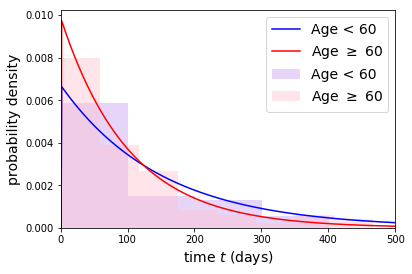

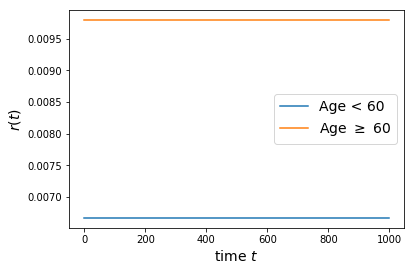

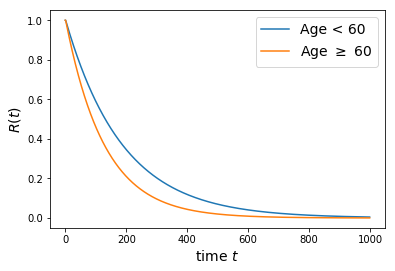

MTTF1 for <scipy.stats._continuous_distns.expon_gen object at 0x0000021C568BC470>:   150.9999683254763
MTTF2 for <scipy.stats._continuous_distns.expon_gen object at 0x0000021C568BC470>:   103.09524414426252
Med1 for <scipy.stats._continuous_distns.expon_gen object at 0x0000021C568BC470>:   104.97205512888014
Med2 for <scipy.stats._continuous_distns.expon_gen object at 0x0000021C568BC470>:   71.76703062715497


In [44]:
for dist in [exp]:
    ind1 = data_x['Age_in_years'] < 60 
    data1 = data_y['Survival_in_days'][ind1]
    data1c = data_y['Status'][ind1]
    ind2 = data_x['Age_in_years'] >= 60 
    data2 = data_y['Survival_in_days'][ind2]
    data2c = data_y['Status'][ind2]


    loc,scale= dist.fit(data1)
    loc2,scale2 = dist.fit(data2)

    hist = plt.hist(data1,normed=True, bins = 10,alpha=0.2, color = 'blueviolet',label='Age < 60')
    hist = plt.hist(data2,normed=True, bins = 8,alpha=0.4, color = 'pink',label='Age $\geq$ 60')

    est1 = dist.pdf(x, loc,scale)
    est2 = dist.pdf(x, loc2,scale2)

    plt.plot(x, est1,color = 'blue',label='Age < 60')
    plt.plot(x, est2,color = 'red',label='Age $\geq$ 60')

    plt.ylabel("probability density",fontsize=14)
    plt.xlabel("time $t$ (days)",fontsize=14)
    plt.xlim([0,500])
    plt.legend(fontsize=14)
    plt.show()


    pdf1 = dist.pdf(x, loc,scale)
    cdf1 = dist.cdf(x, loc,scale)
    err = pdf1/(1-cdf1)
    plt.plot(err[2:],label = 'Age < 60')
    pdf2 = dist.pdf(x, loc2,scale2)
    cdf2 = dist.cdf(x, loc2,scale2)
    err2 = pdf2/(1-cdf2)
    plt.plot(err2[2:],label = 'Age $\geq$ 60')
    plt.xlabel('time $t$',fontsize = 14)
    plt.ylabel('$r(t)$',fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

    plt.plot(1-cdf1, label= 'Age < 60')
    plt.plot(1-cdf2, label = 'Age $\geq$ 60')
    plt.ylabel("${R}(t)$",fontsize = 14)
    plt.xlabel("time $t$",fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

    print("MTTF1 for {}:  ".format(dist),dist.stats(loc, scale, moments='m'))
    print("MTTF2 for {}:  ".format(dist),dist.stats(loc2, scale2, moments='m'))
    
    print("Med1 for {}:  ".format(dist),dist.median(loc, scale))
    print("Med2 for {}:  ".format(dist),dist.median(loc2, scale2))

# Treatment

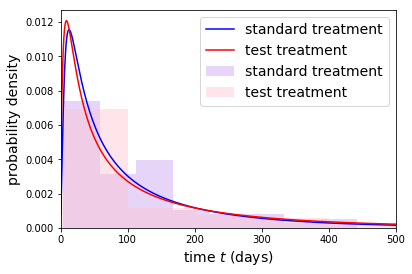

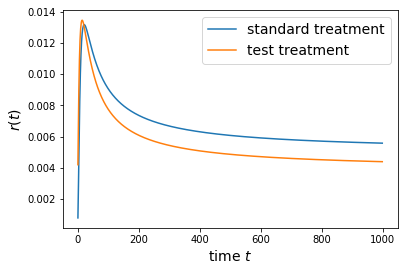

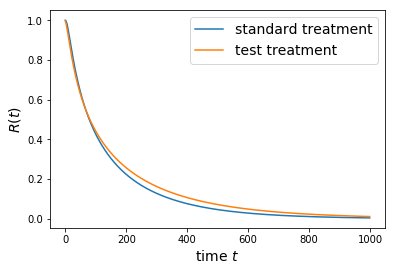

MTTF1 for <scipy.stats._continuous_distns.fatiguelife_gen object at 0x0000021C568BCE10>:   112.99178483580299
MTTF2 for <scipy.stats._continuous_distns.fatiguelife_gen object at 0x0000021C568BCE10>:   129.64401444245485
Med1 for <scipy.stats._continuous_distns.fatiguelife_gen object at 0x0000021C568BCE10>:   63.06438710721457
Med2 for <scipy.stats._continuous_distns.fatiguelife_gen object at 0x0000021C568BCE10>:   64.48774627133812


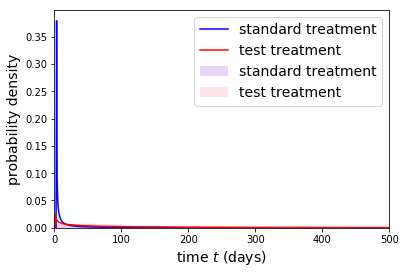

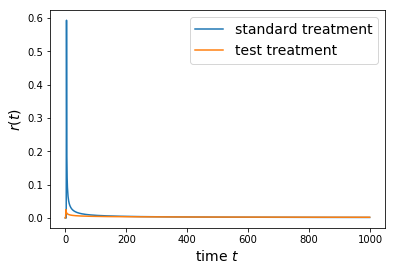

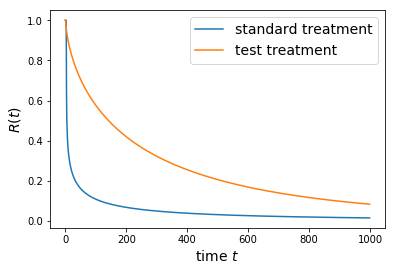

MTTF1 for <scipy.stats._continuous_distns.weibull_min_gen object at 0x0000021C568CD7F0>:   66.30375833597871
MTTF2 for <scipy.stats._continuous_distns.weibull_min_gen object at 0x0000021C568CD7F0>:   271.4476970627403
Med1 for <scipy.stats._continuous_distns.weibull_min_gen object at 0x0000021C568CD7F0>:   4.027343478874723
Med2 for <scipy.stats._continuous_distns.weibull_min_gen object at 0x0000021C568CD7F0>:   113.79282892681577


In [45]:

for dist in distributions:
    ind1 = data_x['Treatment'] == 'standard' 
    data1 = data_y['Survival_in_days'][ind1]
    data1c = data_y['Status'][ind1]
    ind2 = data_x['Treatment'] == 'test'
    data2 = data_y['Survival_in_days'][ind2]
    data2c = data_y['Status'][ind2]


    loc,scale, shape = dist.fit(data1)
    loc2,scale2, shape2 = dist.fit(data2)

    hist = plt.hist(data1,normed=True,alpha=0.2, color = 'blueviolet',label='standard treatment')
    hist = plt.hist(data2,normed=True,alpha=0.4, color = 'pink',label='test treatment')

    est1 = dist.pdf(x, loc,scale, shape)
    est2 = dist.pdf(x, loc2,scale2, shape2)

    plt.plot(x, est1,color = 'blue',label='standard treatment')
    plt.plot(x, est2,color = 'red',label='test treatment')

    plt.ylabel("probability density",fontsize=14)
    plt.xlabel("time $t$ (days)",fontsize=14)
    plt.xlim([0,500])
    plt.legend(fontsize=14)
    plt.show()


    pdf1 = dist.pdf(x, loc,scale, shape)
    cdf1 = dist.cdf(x, loc,scale, shape)
    err = pdf1/(1-cdf1)
    plt.plot(err,label = 'standard treatment')
    pdf2 = dist.pdf(x, loc2,scale2, shape2)
    cdf2 = dist.cdf(x, loc2,scale2, shape2)
    err2 = pdf2/(1-cdf2)
    plt.plot(err2,label = 'test treatment')
    plt.xlabel('time $t$',fontsize = 14)
    plt.ylabel('$r(t)$',fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

    plt.plot(1-cdf1, label= 'standard treatment')
    plt.plot(1-cdf2, label = 'test treatment')
    plt.ylabel("${R}(t)$",fontsize = 14)
    plt.xlabel("time $t$",fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

    print("MTTF1 for {}:  ".format(dist),dist.stats(loc, scale, shape, moments='m'))
    print("MTTF2 for {}:  ".format(dist),dist.stats(loc2, scale2, shape2, moments='m'))
    
    print("Med1 for {}:  ".format(dist),dist.median(loc, scale, shape))
    print("Med2 for {}:  ".format(dist),dist.median(loc2, scale2, shape2))

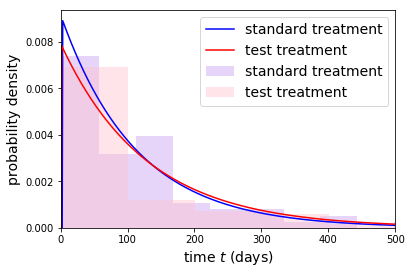

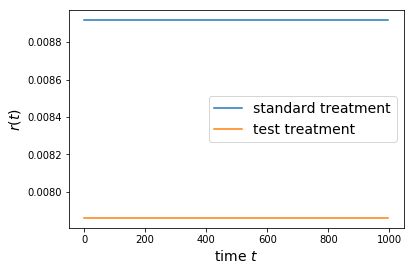

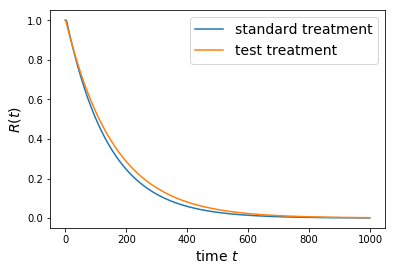

MTTF1 for <scipy.stats._continuous_distns.expon_gen object at 0x0000021C568BC470>:   115.15410499592463
MTTF2 for <scipy.stats._continuous_distns.expon_gen object at 0x0000021C568BC470>:   128.20586442140322
Med1 for <scipy.stats._continuous_distns.expon_gen object at 0x0000021C568BC470>:   80.73930166601538
Med2 for <scipy.stats._continuous_distns.expon_gen object at 0x0000021C568BC470>:   89.17238627437034


In [46]:

for dist in [exp]:
    ind1 = data_x['Treatment'] == 'standard' 
    data1 = data_y['Survival_in_days'][ind1]
    data1c = data_y['Status'][ind1]
    ind2 = data_x['Treatment'] == 'test'
    data2 = data_y['Survival_in_days'][ind2]
    data2c = data_y['Status'][ind2]


    loc,scale = dist.fit(data1)
    loc2,scale2 = dist.fit(data2)

    hist = plt.hist(data1,normed=True,alpha=0.2, color = 'blueviolet',label='standard treatment')
    hist = plt.hist(data2,normed=True,alpha=0.4, color = 'pink',label='test treatment')

    est1 = dist.pdf(x, loc,scale)
    est2 = dist.pdf(x, loc2,scale2)

    plt.plot(x, est1,color = 'blue',label='standard treatment')
    plt.plot(x, est2,color = 'red',label='test treatment')

    plt.ylabel("probability density",fontsize=14)
    plt.xlabel("time $t$ (days)",fontsize=14)
    plt.xlim([0,500])
    plt.legend(fontsize=14)
    plt.show()


    pdf1 = dist.pdf(x, loc,scale)
    cdf1 = dist.cdf(x, loc,scale)
    err = pdf1/(1-cdf1)
    plt.plot(err[4:],label = 'standard treatment')
    pdf2 = dist.pdf(x, loc2,scale2)
    cdf2 = dist.cdf(x, loc2,scale2)
    err2 = pdf2/(1-cdf2)
    plt.plot(err2[2:],label = 'test treatment')
    plt.xlabel('time $t$',fontsize = 14)
    plt.ylabel('$r(t)$',fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

    plt.plot(1-cdf1, label= 'standard treatment')
    plt.plot(1-cdf2, label = 'test treatment')
    plt.ylabel("${R}(t)$",fontsize = 14)
    plt.xlabel("time $t$",fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

    print("MTTF1 for {}:  ".format(dist),dist.stats(loc, scale, moments='m'))
    print("MTTF2 for {}:  ".format(dist),dist.stats(loc2, scale2, moments='m'))
    
    print("Med1 for {}:  ".format(dist),dist.median(loc, scale))
    print("Med2 for {}:  ".format(dist),dist.median(loc2, scale2))

# Celltype

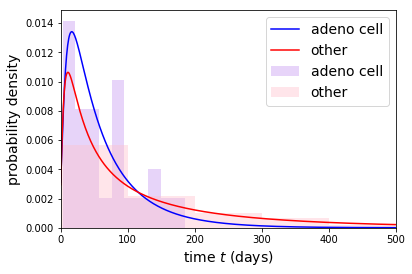

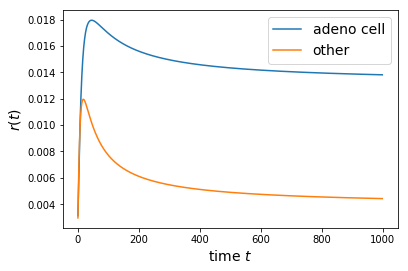

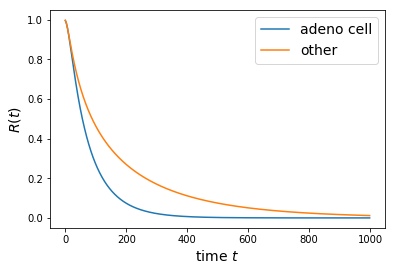

MTTF1 for <scipy.stats._continuous_distns.fatiguelife_gen object at 0x0000021C568BCE10>:   63.753390220527265
MTTF2 for <scipy.stats._continuous_distns.fatiguelife_gen object at 0x0000021C568BCE10>:   134.98382126930102
Med1 for <scipy.stats._continuous_distns.fatiguelife_gen object at 0x0000021C568BCE10>:   44.8506084715749
Med2 for <scipy.stats._continuous_distns.fatiguelife_gen object at 0x0000021C568BCE10>:   70.40924593338153


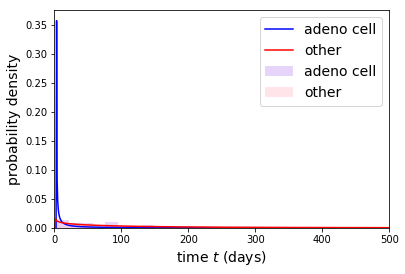

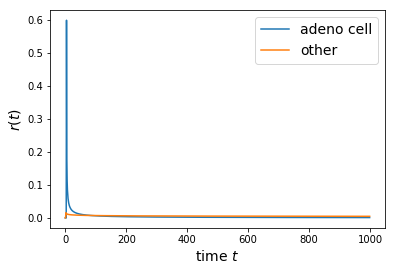

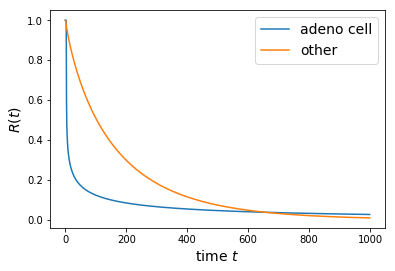

MTTF1 for <scipy.stats._continuous_distns.weibull_min_gen object at 0x0000021C568CD7F0>:   121.42266112958676
MTTF2 for <scipy.stats._continuous_distns.weibull_min_gen object at 0x0000021C568CD7F0>:   140.48551761628033
Med1 for <scipy.stats._continuous_distns.weibull_min_gen object at 0x0000021C568CD7F0>:   3.704564001169977
Med2 for <scipy.stats._continuous_distns.weibull_min_gen object at 0x0000021C568CD7F0>:   82.77268732968982


In [47]:


for dist in distributions:
    ind1 = data_x['Celltype'] == 'adeno' 
    data1 = data_y['Survival_in_days'][ind1]
    data1c = data_y['Status'][ind1]
    ind2 = data_x['Celltype'] != 'adeno'
    data2 = data_y['Survival_in_days'][ind2]
    data2c = data_y['Status'][ind2]


    loc,scale, shape = dist.fit(data1)
    loc2,scale2, shape2 = dist.fit(data2)

    hist = plt.hist(data1,normed=True,alpha=0.2, color = 'blueviolet',label='adeno cell')
    hist = plt.hist(data2,normed=True,alpha=0.4, color = 'pink',label='other')

    est1 = dist.pdf(x, loc,scale, shape)
    est2 = dist.pdf(x, loc2,scale2, shape2)

    plt.plot(x, est1,color = 'blue',label='adeno cell')
    plt.plot(x, est2,color = 'red',label='other')

    plt.ylabel("probability density",fontsize=14)
    plt.xlabel("time $t$ (days)",fontsize=14)
    plt.xlim([0,500])
    plt.legend(fontsize=14)
    plt.show()


    pdf1 = dist.pdf(x, loc,scale, shape)
    cdf1 = dist.cdf(x, loc,scale, shape)
    err = pdf1/(1-cdf1)
    plt.plot(err,label = 'adeno cell')
    pdf2 = dist.pdf(x, loc2,scale2, shape2)
    cdf2 = dist.cdf(x, loc2,scale2, shape2)
    err2 = pdf2/(1-cdf2)
    plt.plot(err2,label = 'other')
    plt.xlabel('time $t$',fontsize = 14)
    plt.ylabel('$r(t)$',fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

    plt.plot(1-cdf1, label= 'adeno cell')
    plt.plot(1-cdf2, label = 'other')
    plt.ylabel("${R}(t)$",fontsize = 14)
    plt.xlabel("time $t$",fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

    print("MTTF1 for {}:  ".format(dist),dist.stats(loc, scale, shape, moments='m'))
    print("MTTF2 for {}:  ".format(dist),dist.stats(loc2, scale2, shape2, moments='m'))
    
    print("Med1 for {}:  ".format(dist),dist.median(loc, scale, shape))
    print("Med2 for {}:  ".format(dist),dist.median(loc2, scale2, shape2))

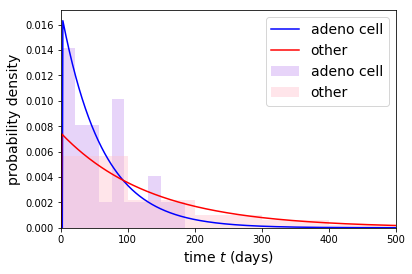

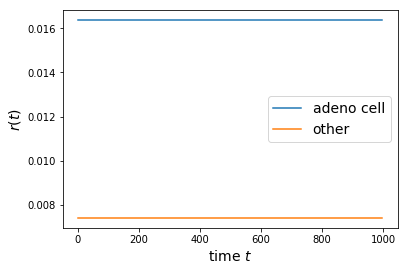

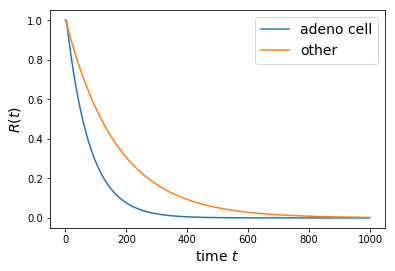

MTTF1 for <scipy.stats._continuous_distns.expon_gen object at 0x0000021C568BC470>:   64.11113927391443
MTTF2 for <scipy.stats._continuous_distns.expon_gen object at 0x0000021C568BC470>:   135.74543630714209
Med1 for <scipy.stats._continuous_distns.expon_gen object at 0x0000021C568BC470>:   45.35901388842493
Med2 for <scipy.stats._continuous_distns.expon_gen object at 0x0000021C568BC470>:   94.39841926960271


In [49]:

for dist in [exp]:
    ind1 = data_x['Celltype'] == 'adeno' 
    data1 = data_y['Survival_in_days'][ind1]
    data1c = data_y['Status'][ind1]
    ind2 = data_x['Celltype'] != 'adeno'
    data2 = data_y['Survival_in_days'][ind2]
    data2c = data_y['Status'][ind2]


    loc,scale = dist.fit(data1)
    loc2,scale2 = dist.fit(data2)

    hist = plt.hist(data1,normed=True,alpha=0.2, color = 'blueviolet',label='adeno cell')
    hist = plt.hist(data2,normed=True,alpha=0.4, color = 'pink',label='other')

    est1 = dist.pdf(x, loc,scale)
    est2 = dist.pdf(x, loc2,scale2)

    plt.plot(x, est1,color = 'blue',label='adeno cell')
    plt.plot(x, est2,color = 'red',label='other')

    plt.ylabel("probability density",fontsize=14)
    plt.xlabel("time $t$ (days)",fontsize=14)
    plt.xlim([0,500])
    plt.legend(fontsize=14)
    plt.show()


    pdf1 = dist.pdf(x, loc,scale)
    cdf1 = dist.cdf(x, loc,scale)
    err = pdf1/(1-cdf1)
    plt.plot(err[4:],label = 'adeno cell')
    pdf2 = dist.pdf(x, loc2,scale2)
    cdf2 = dist.cdf(x, loc2,scale2)
    err2 = pdf2/(1-cdf2)
    plt.plot(err2[2:],label = 'other')
    plt.xlabel('time $t$',fontsize = 14)
    plt.ylabel('$r(t)$',fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

    plt.plot(1-cdf1, label= 'adeno cell')
    plt.plot(1-cdf2, label = 'other')
    plt.ylabel("${R}(t)$",fontsize = 14)
    plt.xlabel("time $t$",fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

    print("MTTF1 for {}:  ".format(dist),dist.stats(loc, scale, moments='m'))
    print("MTTF2 for {}:  ".format(dist),dist.stats(loc2, scale2, moments='m'))
    
    print("Med1 for {}:  ".format(dist),dist.median(loc, scale))
    print("Med2 for {}:  ".format(dist),dist.median(loc2, scale2))